In [120]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Работа с датасетом

### Numpy часть

- Выполняется с помощью numpy и базовой функциональности python.
  - [ ] Получить датасет [**Ирис**](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
  - [ ] Представить датасет одномерный/двумерный массивы (признаки поместить в матрицу `(n, 4)`, названия самого ириса --- вектор размера n). Отобразите сколько места он занимает.
  - [ ] Нормализуйте данные на промежуток от 0 до 1 для каждой колонки
  - [ ] Представьте один из признаков в виде категориальной переменной и её на три типа используя квантили:
    - < 0.25 --- small
    - 0.25-0.75 --- medium
    - \> 0.75 --- big
  - [ ] Разделите датасет на две случайные выборки (0.8 / 0.2)
- Выполняется с помощью пакетов sklearn и numpy
  - [ ] Выберите один из [методов классификации](https://scikit-learn.org/stable/supervised_learning.html) (к примеру, [SVC](https://scikit-learn.org/stable/modules/svm.html)), обучите на тренировочном датасете, оцените результат на тестовом и сделайте выводы
  - [ ] Проведите три эксперимента изменяя гиперпараметры модели или условия препроцессинга данных (например, нормализованные или нет данные), **сделайте выводы**
  - [ ] Пользуясь методами [уменьшения размерности](https://ru.wikipedia.org/wiki/%D0%A1%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8) ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [t-sne](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)) визуализируйте датасет.
  Это должен быть scatter plot, где точка это отдельный ирис, ее координаты -- признаки со сжатой выбранной вам размерностью, а цвет -- тип ириса. Нарисуйте этот график дважды, где
    - Тип ириса выбирается из оригинальных данных
    - Тип ириса выбирается из предсказанных данныхказанных данных

<u> Iris </u>
* Sepal Length (0) - Длина чашелистика
* Sepal Width (1) - Ширина чашелистика
* Petal Length (2) - Длина лепестка
* Petal Width (3) - Ширина лепестка

In [121]:
with open('Iris.txt', 'r') as file:
    mas = [l.strip().split(',') for l in file]
    
mas[:2]

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa']]

In [122]:
df_features = np.array([[float(x) for x in r[:4]] for r in mas])
df_features[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

Получили массив с признаками 

In [123]:
df_names = np.array([r[4] for r in mas], dtype = '<U15')
df_names[:2]

array(['Iris-setosa', 'Iris-setosa'], dtype='<U15')

Одномерный массив с названиями 

In [124]:
df_features.shape, df_names.shape, df_features.nbytes, df_names.nbytes

((150, 4), (150,), 4800, 9000)

Всего <u>150 строк</u>, двумерный занимает 4800 байт, одномерный - 9000 (из-за строк), суммарно <u>13800 байт</u>

In [125]:
min_f = np.min(df_features, axis=0)
max_f = np.max(df_features, axis=0)
df_features_norm = (df_features - min_f) / (max_f - min_f)
df_features_norm[:3]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667]])

<u>Нормализовали</u> массив с характеристиками

In [51]:
feature_1 = df_features_norm[:, 1]
q25, q75 = np.quantile(feature_1, [0.25, 0.75])

cat = []
for i in feature_1:
    if i < q25:
        cat.append('small')
    elif i > q75:
        cat.append('big')
    else:
        cat.append('medium')

cat_feature_1 = np.array(cat)
cat_feature_1[:3]

array(['big', 'medium', 'medium'], dtype='<U6')

Второй признак представляем в виде <u>категориальной переменной</u>

In [64]:
df_train, df_test, name_train, name_test = train_test_split(
    df_features, df_names, test_size=0.2, random_state=42
)

df_train.shape, name_train.shape

((120, 4), (120,))

Разделили на <u>случайные выборки (0.8 и 0.2)</u>

# Эксперименты 

In [86]:
svc_model = SVC(random_state=44)
svc_model.fit(df_train, name_train)
name_pred = svc_model.predict(df_test)

accuracy_score(name_test, name_pred)

1.0

In [63]:
confusion_matrix(name_test, name_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<u>Точность равна 1.0</u>, а также матрица ошибка оказалась диагональной, значит, модель отлично обучается на тестовых данных 

* Разные ядра в SVC

In [87]:
for i in ['linear', 'sigmoid', 'poly', 'rbf']:
    new_model = SVC(kernel=i, random_state=44)
    new_model.fit(df_train, name_train)
    print(accuracy_score(name_test, new_model.predict(df_test)))

1.0
0.3
1.0
1.0


<u>Ядро sigmoid</u> не подходит, точность 0.3, остальные же ядра - да, точность сохраняется

* Нормализация данных 

In [88]:
df_train_norm, df_test_norm, name_train_norm, name_test_norm = train_test_split(
    df_features_norm, df_names, test_size=0.2, random_state=44
)

svc_model_norm = SVC(random_state=42)
svc_model_norm.fit(df_train_norm, name_train_norm)
name_pred_norm = svc_model_norm.predict(df_test_norm)

accuracy_score(name_test_norm, name_pred_norm)

0.9666666666666667

При нормализации <u>точность уменьшилась</u>

* Другой параметр регуляризации в SVC

In [93]:
for C in [0.00001, 0.01, 0.1, 10.0, 100.0]:
    model_C = SVC(C=C, random_state=44) 
    model_C.fit(df_train, name_train)
    name_pred = model_C.predict(df_test)
    print(accuracy_score(name_test, name_pred))

0.3
0.3
0.9666666666666667
1.0
0.9666666666666667


Итак, <u>параметр регуляризации</u> меняет точность, если он слишком маленький или большой (а при С <= 0.01 равен 0.3)

# Графики

In [99]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_features)
df_pca.shape

(150, 2)

Выделяем 2 признака из датасета 

In [111]:
df_pca_train, df_pca_test, name_pca_train, name_pca_test = train_test_split(
    df_pca, df_names, test_size=0.2, random_state=44
)

svc_pca = SVC(random_state=44)
svc_pca.fit(df_pca_train, name_pca_train)
name_pred_pca = svc_pca.predict(df_pca_test)

accuracy_score(name_pca_test, name_pred_pca)

0.9666666666666667

Точность не ~1.0, как с 4 признаками, но больше 0.96

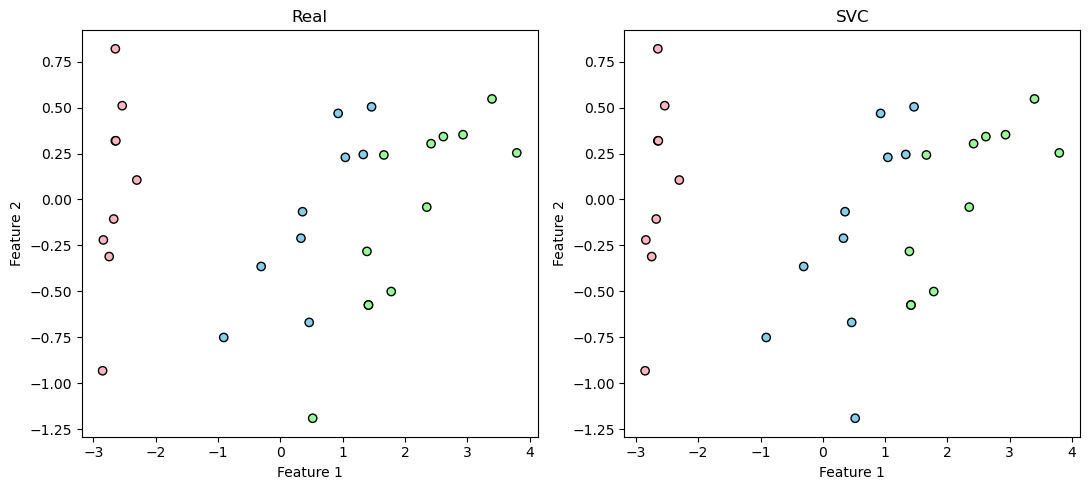

In [119]:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_pca_test[:, 0], df_pca_test[:, 1], c=[0 if name == 'Iris-setosa' else 1 if name == 'Iris-versicolor' else 2 for name in name_pca_test], cmap=plt.cm.colors.ListedColormap(['#FFB6C1', '#87CEEB', '#98FB98']), edgecolor='k')
plt.title("Real")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(df_pca_test[:, 0], df_pca_test[:, 1], c=[0 if name == 'Iris-setosa' else 1 if name == 'Iris-versicolor' else 2 for name in name_pred_pca], cmap=plt.cm.colors.ListedColormap(['#FFB6C1', '#87CEEB', '#98FB98']), edgecolor='k')
plt.title("SVC")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

Итак, предсказан неправильно только один объект 